In [2]:
import sys
import warnings

import pickle
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [12]:
df = pd.read_csv("losses.csv")

In [13]:
df

,model,loss
0,n32_eA_rF_vMedian,0.615254
1,n32_eA_rF_vMedian,0.615254
2,n32_eA_rF_vMedian,0.615254
3,n32_eA_rF_vMedian,0.615254
4,n32_eA_rF_vMedian,0.615254
5,n32_eA_rF_vMedian,0.615254
6,n32_eA_rF_vMedian,0.615254
7,n32_eA_rF_vMedian,0.615254
8,n32_eA_rF_vMedian,0.615254
9,n32_eA_rF_vMedian,0.615254


n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n16_eA_loss:
sampling_replacement = False
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n4_eA_loss / n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n4_eA_mean_loss:
sampling_replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEAN


n4_eA_rT_vA_loss:
sampling_replacement = True
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n16_eA_rT_vA:
sampling_replacement = True
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n32_eA_rT_vMed:
sampling_replacement = True
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


<AxesSubplot:xlabel='model', ylabel='loss'>

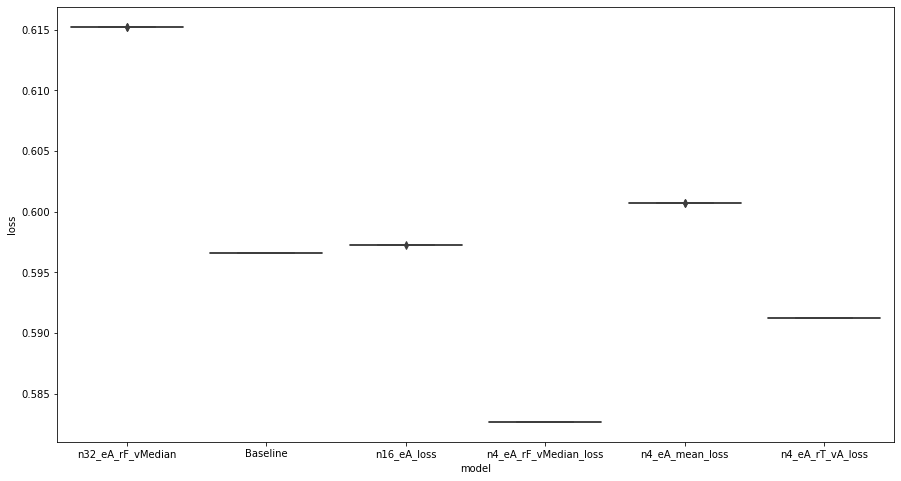

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.boxplot(data=df, x="model", y="loss")

<AxesSubplot:xlabel='model', ylabel='loss'>

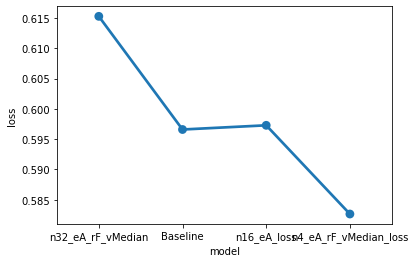

In [10]:
sns.pointplot(data=df, x="model", y="loss")